## Projeto 2 - SCC0275 - Introdução à Ciência de Dados

### Nome: Nilo Conrado Messias Alves Cangerana
### Número USP: 9805362

In [28]:
#imports
import platform
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
print("Versão Python utilizada: ",platform.python_version()) 

Versão Python utilizada:  3.7.9


## Questão 1

#### a)

In [5]:
#Carregar train.csv e test.csv
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
#Visualização das 15 primeiras linhas das bases de treino e teste
df_train.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df_test.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,84693.0,-0.439952,0.683758,1.225814,0.639113,0.716765,0.089295,0.657718,0.034213,-0.472679,0.352698,1.033706,-0.058832,-1.035406,0.514048,0.740893,-0.373862,-0.325962,0.360276,0.463212,0.211867,0.127443,0.588590,-0.145728,-0.322900,-0.299744,-0.310295,0.248317,-0.011493,19.00,0
1,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,-8.745973,5.416042,-8.164125,-0.165011,-10.193530,-1.895210,-7.360475,-14.668771,-4.877119,1.385610,0.667310,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1
2,84695.0,1.013114,-0.334412,1.305208,0.837406,-1.126833,-0.064321,-0.594753,0.147737,0.536360,-0.120472,1.278799,1.600888,0.687623,-0.334877,-0.591809,0.271403,-0.391718,0.111543,0.148289,0.069161,0.017079,0.112210,-0.016084,0.595033,0.201073,0.278215,0.007457,0.030762,66.60,0
3,84695.0,0.969231,-0.233554,0.238473,0.145793,-0.545741,-0.970680,0.347393,-0.209522,-0.342571,-0.100331,1.863432,1.447944,0.623840,0.484863,0.187976,0.303599,-0.463637,-0.602120,0.443652,0.240978,-0.362820,-1.417272,0.162136,0.541628,-0.079465,0.268702,-0.101237,0.028234,141.00,0
4,84696.0,-0.856523,1.080875,1.866956,1.729941,-0.161741,0.028789,0.401787,0.043774,-0.213916,0.155907,-0.471518,-0.662773,-1.727412,0.303559,0.876071,-1.530284,1.118193,-0.536345,1.391628,-0.068915,0.007365,0.077392,-0.221906,0.394141,0.237225,-0.080102,-0.291408,0.092140,2.60,0
5,84697.0,-3.475135,2.733552,-2.076117,-1.397827,0.989148,3.186942,-1.068531,2.213936,0.257606,1.155245,-0.502183,0.312496,0.191305,0.745148,1.057144,0.750413,-0.442539,0.091274,0.277030,0.243802,-0.265222,-0.975984,0.164327,0.965447,0.143647,-0.045636,-1.238443,-0.607945,19.98,0
6,84697.0,1.329299,0.368594,-0.103628,0.451179,0.166774,-0.484906,0.099838,-0.169069,0.021796,-0.296257,-0.876577,0.183004,0.929035,-0.452967,1.109623,0.747256,-0.401353,-0.035611,0.177713,-0.016198,-0.348273,-0.971666,-0.000617,-0.648599,0.368595,0.155167,-0.020778,0.021590,0.89,0
7,84701.0,1.094503,0.051973,0.084046,0.920497,0.012089,0.010475,0.030591,0.111480,-0.131221,0.145106,1.084775,0.391024,-0.915495,0.778467,0.596547,0.095359,-0.466401,0.118013,-0.324281,-0.119105,0.102241,0.198007,-0.151306,-0.317430,0.582522,-0.297646,0.011829,0.009342,49.00,0
8,84702.0,-4.477469,2.938942,0.072835,1.610330,-2.589022,0.087083,-1.444100,1.648856,1.258163,0.835510,-1.609646,1.226742,-0.186103,-0.044463,-1.600046,-1.091469,1.630307,-0.681338,1.496434,-0.376963,-0.074815,-0.656715,0.143930,0.710834,-0.012131,-0.614982,-2.099252,-0.136181,21.10,0
9,84702.0,-0.611896,1.210103,0.218658,-0.088198,0.769349,-0.353664,0.704043,0.417232,-1.142765,-0.630011,0.962291,1.127087,0.477265,0.811974,-0.549074,0.083372,-0.564702,-0.176857,-0.863749,-0.286417,0.212011,0.474091,-0.196054,-0.288881,0.163885,-0.483152,-0.078167,-0.057451,1.00,0


In [8]:
#Checar todos tipos de valores na coluna Class
df_train['Class'].unique(), df_test['Class'].unique()

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

A variável resposta do problema está representada na última coluna das bases, ou seja, é a coluna com nome Class. Esta variável pode ter valor 0 ou 1, onde 1 representa transação com fraude e 0 transação sem fraude.

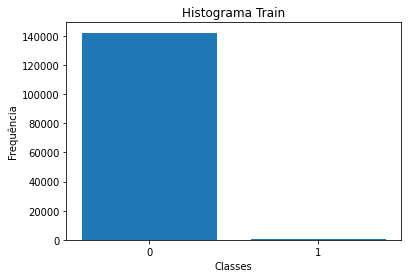

In [9]:
train_arr = np.array(df_train['Class'])

values, qtd = np.unique(train_arr, return_counts=True)
plt.title('Histograma Train')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.bar(values, qtd, align='center')
plt.gca().set_xticks(values)
plt.show()

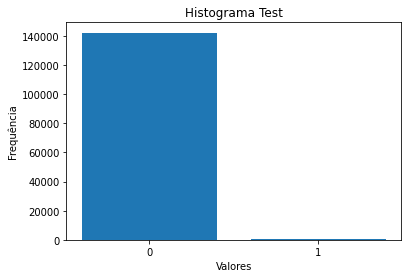

In [10]:
test_arr = np.array(df_test['Class'])

values_test, qtd_test = np.unique(test_arr, return_counts=True)
plt.title('Histograma Test')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.bar(values_test, qtd_test, align='center')
plt.gca().set_xticks(values_test)
plt.show()

#### b)

A coluna que representa um metadado é a coluna 1(Time), pois essa coluna contém informação do tempo que foi realizada determinada transação em relação a primeira transação que ocorreu no tempo 0.

## Questão 2

#### a)

In [11]:
#Remover coluna Time dos dataframes de Train e Test
df_train_new = df_train.drop(columns=['Time'])
df_test_new = df_test.drop(columns=['Time'])

#Gerar X_train, y_train, X_test, y_test em numpy array
X_train=df_train_new.to_numpy()
X_test=df_test_new.to_numpy()

y_train=X_train[:, X_train.shape[1]-1]
y_test=X_test[:, X_test.shape[1]-1]

X_train=X_train[:,:-1]
X_test=X_test[:,:-1]

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142404, 29), (142404,), (142403, 29), (142403,))

In [13]:
#Modelo que classifica aleatoriamente
def randomModel(x_array): #recebe um np array com todas as linhas da base
    predict=np.array([])
    for i in range(x_array.shape[0]):
        random_number=randint(0,1) #gera um valor 0 ou 1 aleatorio para cada linha da base
        predict = np.append(predict, random_number) #adiciona o resultado ao predict
    return predict

In [14]:
#Testando o modelo na base de teste
predict1=randomModel(X_test)

In [15]:
#Calcular Acuracia e AUC
p1_accuracy = accuracy_score(y_test, predict1)
p1_auc = roc_auc_score(y_test, predict1)

In [16]:
#Valor da Acurácia
p1_accuracy

0.49778445678812944

In [17]:
#Valor da AUC
p1_auc

0.5246348025965949

In [18]:
#Modelo que classifica todos casos como fraude
def fraudeModel(x_array): #recebe um np array com todas as linhas da base
    predict=np.array([])
    for i in range(x_array.shape[0]):
        predict = np.append(predict, 1)
    return predict

In [19]:
predict2=fraudeModel(X_test)

In [20]:
#Calcular Acuracia e AUC
p2_accuracy = accuracy_score(y_test, predict2)
p2_auc = roc_auc_score(y_test, predict2)

In [21]:
#Valor da Acurácia
p2_accuracy

0.0015659782448403474

In [22]:
#Valor da AUC
p2_auc

0.5

In [23]:
#Modelo que classifica todos casos como não fraude
def naoFraudeModel(x_array): #recebe um np array com todas as linhas da base
    predict=np.array([])
    for i in range(x_array.shape[0]):
        predict = np.append(predict, 0)
    return predict

In [24]:
predict3=naoFraudeModel(X_test)

In [25]:
#Calcular Acuracia e AUC
p3_accuracy = accuracy_score(y_test, predict3)
p3_auc = roc_auc_score(y_test, predict3)

In [26]:
#Valor da Acurácia
p3_accuracy

0.9984340217551596

In [27]:
#Valor da AUC
p3_auc

0.5

#### b)

A métrica de avaliação que deve ser utilizada para este problema é a AUC. Como é possível ver nos resultados obtidos acima, a quantidade de fraudes é muito inferior a quantidade de transações verdadeiras e, portanto, um modelo utilizando a métrica de acurácia poderia resultar em uma acurácia muito alta, mesmo errando todas previsões de fraudes(o modelo que classifica todos os casos como não fraude obteve 99,8% de acurácia). Isso faz com que a medida de acurácia seja ineficiente para o propósito requerido.

## Questão 3

#### a)

In [29]:
#Instanciar RandomForestClassifier
modelRFC = RandomForestClassifier(random_state=42)

#Definição dos hiperparametros que serão variados:
hyperRFC = {'n_estimators':[10, 50, 100, 200], 
            'max_depth':[2, 3, 4, 5]}

In [30]:
#Instanciar GridSearchCV
gsRFC=GridSearchCV(modelRFC, hyperRFC, scoring='roc_auc', cv=3, verbose=2)

#Treinar RFC
gsRFC.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   1.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   1.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   1.0s
[CV] END .......................max_depth=2, n_estimators=50; total time=   5.3s
[CV] END .......................max_depth=2, n_estimators=50; total time=   5.4s
[CV] END .......................max_depth=2, n_estimators=50; total time=   5.1s
[CV] END ......................max_depth=2, n_estimators=100; total time=  11.4s
[CV] END ......................max_depth=2, n_estimators=100; total time=  10.8s
[CV] END ......................max_depth=2, n_estimators=100; total time=  10.1s
[CV] END ......................max_depth=2, n_estimators=200; total time=  21.0s
[CV] END ......................max_depth=2, n_estimators=200; total time=  20.5s
[CV] END ......................max_depth=2, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [36]:
print('Melhor modelo RFC:',gsRFC.best_estimator_)
print('AUC do melhor modelo:',gsRFC.best_score_)

Melhor modelo RFC: RandomForestClassifier(max_depth=5, random_state=42)
AUC do melhor modelo: 0.9673589128101902


In [39]:
#Calcular AUC na base de teste
AUC_bestRFC=roc_auc_score(y_test,gsRFC.best_estimator_.predict(X_test))
AUC_bestRFC

0.8385087557173468

#### b)

In [40]:
#Instanciar RandomForestClassifier
modelRFC2 = RandomForestClassifier(random_state=42, class_weight='balanced')

In [41]:
#Instanciar GridSearchCV
gsRFC2=GridSearchCV(modelRFC2, hyperRFC, scoring='roc_auc', cv=3, verbose=2)

#Treinar RFC
gsRFC2.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   1.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.9s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.9s
[CV] END .......................max_depth=2, n_estimators=50; total time=   4.9s
[CV] END .......................max_depth=2, n_estimators=50; total time=   5.0s
[CV] END .......................max_depth=2, n_estimators=50; total time=   5.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=  10.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=  10.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=  10.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=  21.0s
[CV] END ......................max_depth=2, n_estimators=200; total time=  20.7s
[CV] END ......................max_depth=2, n_es

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [42]:
print('Melhor modelo RFC com class_weight:',gsRFC2.best_estimator_)
print('AUC do melhor modelo com class_weight:',gsRFC2.best_score_)

Melhor modelo RFC com class_weight: RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       random_state=42)
AUC do melhor modelo com class_weight: 0.9810531580905045


In [43]:
#Calcular AUC na base de teste
AUC_bestRFC2=roc_auc_score(y_test,gsRFC2.best_estimator_.predict(X_test))
AUC_bestRFC2

0.898667072056075

Observando os resultados, é possível ver que o valor da AUC para o modelo com o parâmetro class_weight='balanced' é maior, ou seja, o modelo apresenta melhor performance na classificação da base. Isso acontece pois o parâmetro adiciona pesos inversamente proporcionais à frequências das classes do problema, resolvendo o problema de desbalanceamento da base.

## Questão 4

#### a)

In [44]:
fraudeBloq=100
naoFraudeBloq=-2

#Probabilidades de fraudes no conjunto de teste
predictProba=gsRFC2.best_estimator_.predict_proba(X_test)

In [45]:
predictProba[:10]

array([[0.95980724, 0.04019276],
       [0.02148837, 0.97851163],
       [0.96777351, 0.03222649],
       [0.97289781, 0.02710219],
       [0.94918356, 0.05081644],
       [0.97873739, 0.02126261],
       [0.92409313, 0.07590687],
       [0.95108127, 0.04891873],
       [0.96231927, 0.03768073],
       [0.94881218, 0.05118782]])

In [49]:
#Ordenar vetor por probabilidade de ser fraude. Da maior probabilidade até a menor:
predictProbaSorted=sorted(enumerate(predictProba[:,1]), key=lambda i: i[1], reverse=True)

#Formato da lista gerada: (Indice do valor no array predictProba, Probabilidade de ser fraude)
predictProbaSorted[:10]

[(15467, 0.9986449500691503),
 (121473, 0.9986141030026957),
 (1704, 0.9985771661431015),
 (14586, 0.998566543937008),
 (1324, 0.9985093157139759),
 (1700, 0.9985093157139759),
 (929, 0.9985025195531952),
 (930, 0.9985025195531952),
 (931, 0.9985025195531952),
 (932, 0.9985025195531952)]

In [55]:
#Gerando uma lista com apenas o top 1% das transações com mais chances de ser fraude, que serão barradas
topFraudes=predictProbaSorted[:int(len(predictProbaSorted)*0.01)]

In [57]:
#Serão barradas 1424 transações.
len(topFraudes)

1424

In [58]:
#Calcular lucro
lucro=0
for i in topFraudes:
    if y_test[i[0]]==1: #se um transação i for fraude e foi impedida de acontecer
        lucro+=fraudeBloq
    elif y_test[i[0]]==0: #se uma transação i não for fraude e foi impedida de acontecer
        lucro+=naoFraudeBloq

print('Lucro calculado:',lucro)

Lucro calculado: 16532
